## House Prices Prediction

#### Import Data

In [29]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load the data
housing_data = fetch_california_housing(as_frame=True)

In [3]:
housing_data

{'data':        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
 0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
 1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
 2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
 3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
 4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
 ...       ...       ...       ...        ...         ...       ...       ...   
 20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
 20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
 20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
 20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
 20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   
 
        Longitude 

In [4]:
df = pd.concat([housing_data.data,housing_data.target],axis=1)

In [5]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


### Part 1: Data Pre-processing

#### Exploratory Data Analysis

In [6]:
df.shape

(20640, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [8]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [9]:
df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

There are no missing values in the dataset


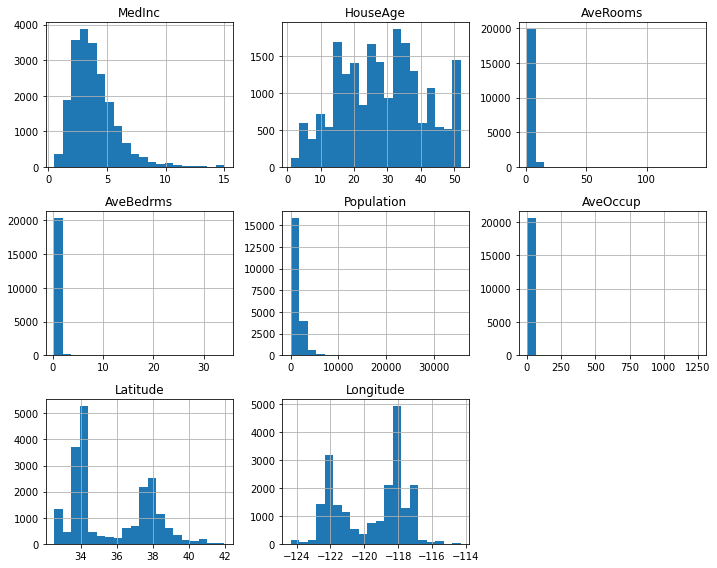

In [10]:
# Plot distributions of the numerical features
df.drop(columns='MedHouseVal').hist(bins=20, figsize=(10, 8))
plt.tight_layout()
plt.show()

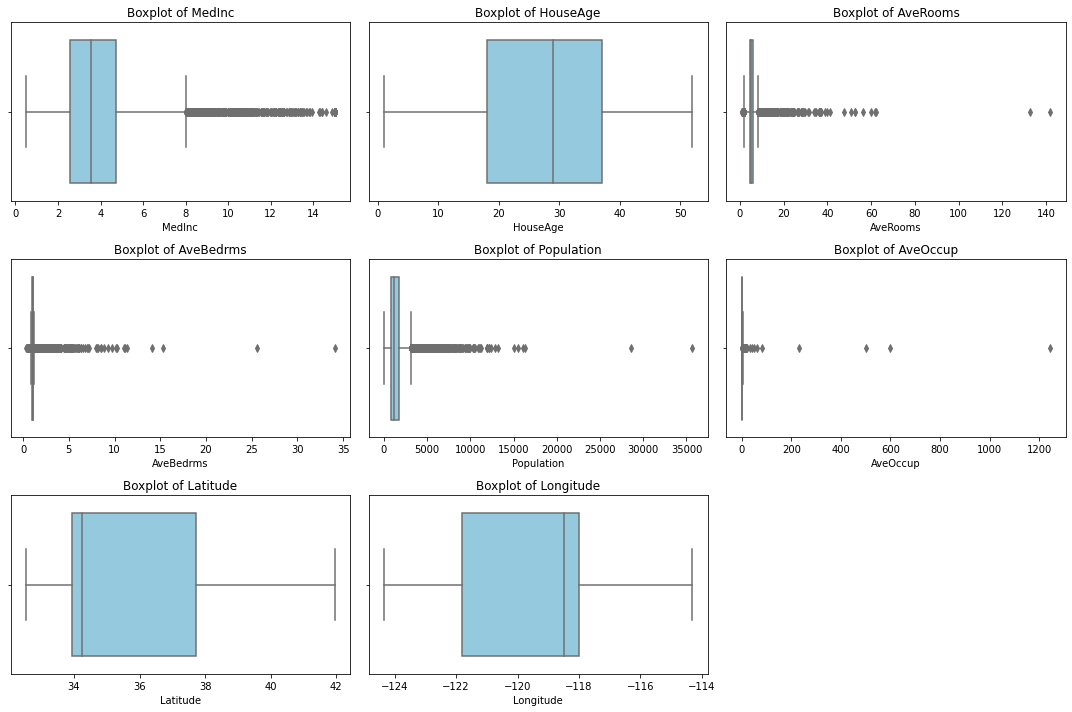

In [11]:
features = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

# Create boxplots for each feature
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[feature], color="skyblue")
    plt.title(f'Boxplot of {feature}')
    plt.tight_layout()

plt.show()


The seemed outliers may not be supposed to be outliers as they represent the natural real world data. 

As few people income can be very high whereas few can be very low

Similarly those of Average rooms and bed rooms naturally vary from place to place.

Population and occupation can also vary from place to place and household to household

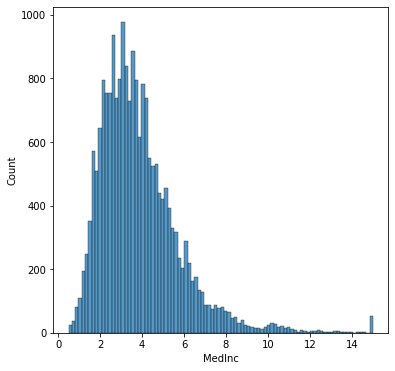

In [77]:
plt.figure(figsize=(6,6))
sns.histplot(df['MedInc']);

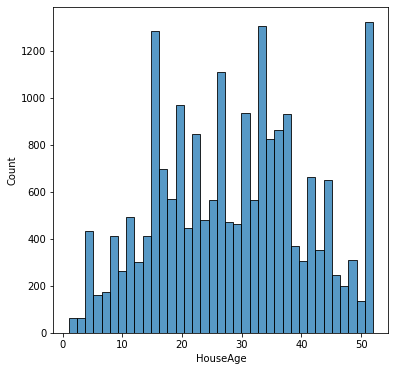

In [78]:
plt.figure(figsize=(6,6))
sns.histplot(df['HouseAge']);

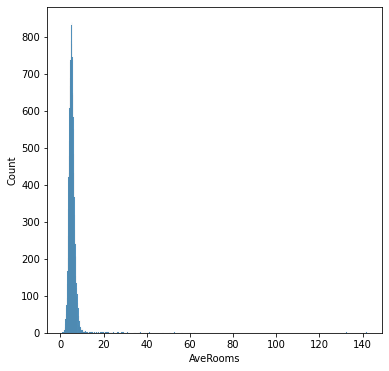

In [79]:
plt.figure(figsize=(6,6))
sns.histplot(df['AveRooms']);

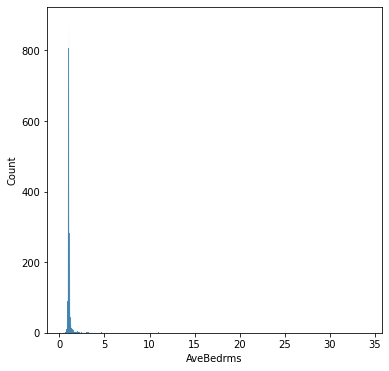

In [86]:
plt.figure(figsize=(6,6))
sns.histplot(df['AveBedrms']);

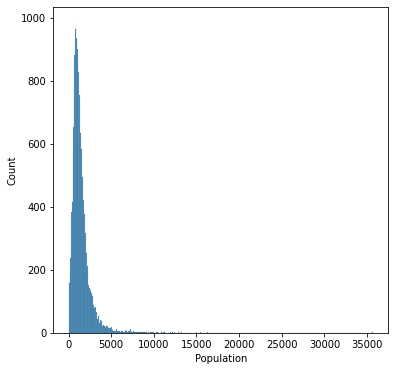

In [87]:
plt.figure(figsize=(6,6))
sns.histplot(df['Population']);

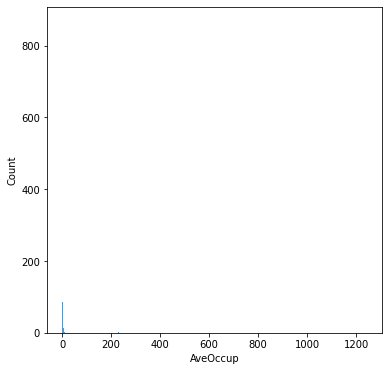

In [88]:
plt.figure(figsize=(6,6))
sns.histplot(df['AveOccup']);

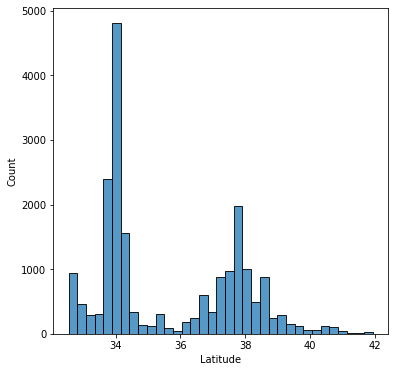

In [89]:
plt.figure(figsize=(6,6))
sns.histplot(df['Latitude']);

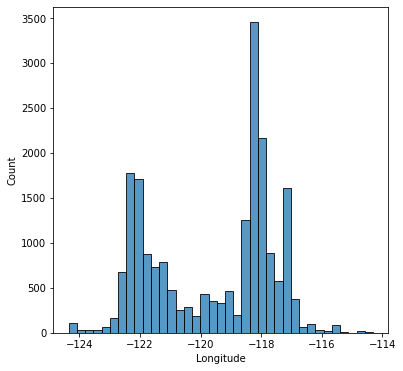

In [90]:
plt.figure(figsize=(6,6))
sns.histplot(df['Longitude']);

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

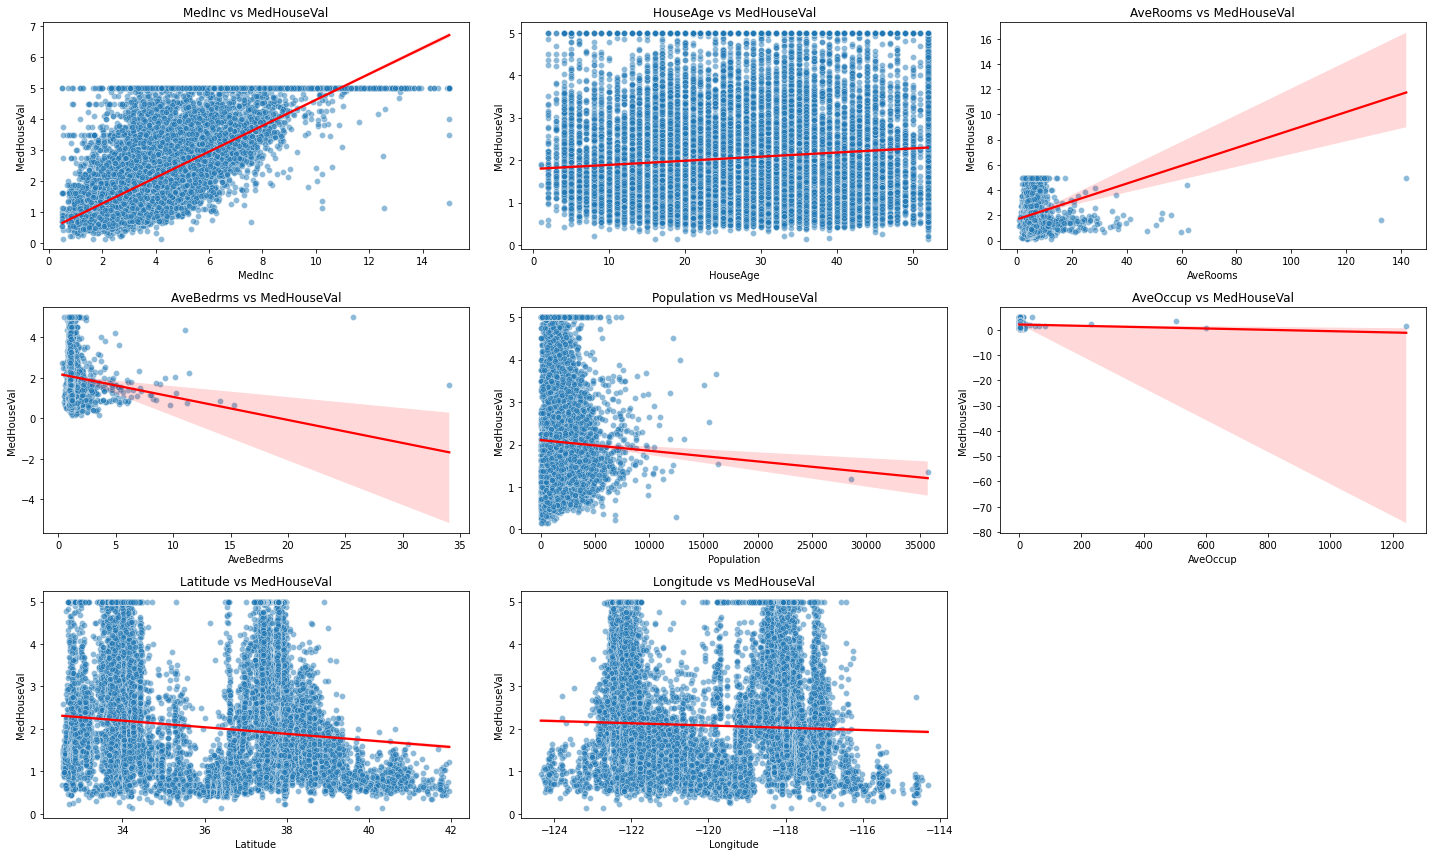

Correlation with target:
MedHouseVal    1.000000
MedInc         0.688075
AveRooms       0.151948
HouseAge       0.105623
AveOccup      -0.023737
Population    -0.024650
Longitude     -0.045967
AveBedrms     -0.046701
Latitude      -0.144160
Name: MedHouseVal, dtype: float64


In [ ]:
# Bivariate analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Features and target variable
features = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
target = 'MedHouseVal'


# 1. Plot scatterplots for each feature against the target
plt.figure(figsize=(20, 12))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(x=df[feature], y=df[target], alpha=0.5)
    sns.regplot(x=df[feature], y=df[target], scatter=False, color="red")
    plt.title(f"{feature} vs {target}")
plt.tight_layout()
plt.show()

# 2. Compute correlation coefficients
correlations = df[features + [target]].corr()[target].sort_values(ascending=False)
print("Correlation with target:")
print(correlations)


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler


# Define features and target
features = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
target = 'MedHouseVal'

# Separate features and target
X = df[features]
y = df[target]

# Standard Scaling
standard_scaler = StandardScaler()
X_standard_scaled = standard_scaler.fit_transform(X)
X_standard_scaled = pd.DataFrame(X_standard_scaled, columns=features)

# Display scaled data (choose one for further modeling)
print("Standard Scaled Features:")
print(X_standard_scaled.head())


Standard Scaled Features:
     MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  2.344766  0.982143  0.628559  -0.153758   -0.974429 -0.049597  1.052548   
1  2.332238 -0.607019  0.327041  -0.263336    0.861439 -0.092512  1.043185   
2  1.782699  1.856182  1.155620  -0.049016   -0.820777 -0.025843  1.038503   
3  0.932968  1.856182  0.156966  -0.049833   -0.766028 -0.050329  1.038503   
4 -0.012881  1.856182  0.344711  -0.032906   -0.759847 -0.085616  1.038503   

   Longitude  
0  -1.327835  
1  -1.322844  
2  -1.332827  
3  -1.337818  
4  -1.337818  


In [81]:
X_standard_scaled

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,2.344766,0.982143,0.628559,-0.153758,-0.974429,-0.049597,1.052548,-1.327835
1,2.332238,-0.607019,0.327041,-0.263336,0.861439,-0.092512,1.043185,-1.322844
2,1.782699,1.856182,1.155620,-0.049016,-0.820777,-0.025843,1.038503,-1.332827
3,0.932968,1.856182,0.156966,-0.049833,-0.766028,-0.050329,1.038503,-1.337818
4,-0.012881,1.856182,0.344711,-0.032906,-0.759847,-0.085616,1.038503,-1.337818
...,...,...,...,...,...,...,...,...
20635,-1.216128,-0.289187,-0.155023,0.077354,-0.512592,-0.049110,1.801647,-0.758826
20636,-0.691593,-0.845393,0.276881,0.462365,-0.944405,0.005021,1.806329,-0.818722
20637,-1.142593,-0.924851,-0.090318,0.049414,-0.369537,-0.071735,1.778237,-0.823713
20638,-1.054583,-0.845393,-0.040211,0.158778,-0.604429,-0.091225,1.778237,-0.873626


In [82]:
scaled_data = X_standard_scaled.copy()
scaled_data['MedHouseVal'] = y

In [83]:
corr_data = scaled_data.corr()

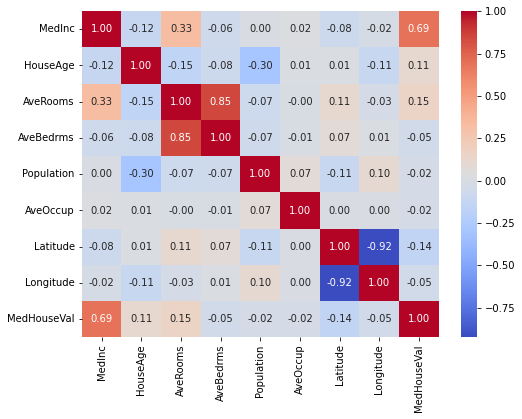

In [84]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_data,annot=True,cmap='coolwarm',fmt='.2f')
plt.show()

MedInc (Median Income):

- Strong positive correlation with MedHouseVal (0.69).
- Suggests that as median income increases, housing values also tend to increase.
- This feature is highly predictive of the target variable.


AveRooms (Average Number of Rooms):

- Moderate positive correlation with MedHouseVal (0.31).
- Indicates that areas with more average rooms tend to have higher housing values.

Latitude and Longitude:

- Latitude has a weak negative correlation with MedHouseVal (-0.14).
- Longitude has almost no correlation with the target variable (-0.05).
- Suggests that location (latitude and longitude) has little influence on housing values in this dataset.

Multicollinearity Between Features:

- Strong positive correlation between AveRooms and AveBedrms (0.85).
- Indicates multicollinearity, which could lead to redundancy in features. 
- Consider feature selection or dimensionality reduction.

Other Features:

- HouseAge shows a weak positive correlation with MedHouseVal (0.11).
- Population and AveOccup have very weak correlations with MedHouseVal (-0.02 and -0.28, respectively).

In [120]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Prepare data
X = scaled_data[['Latitude', 'Longitude']]
y = scaled_data['MedHouseVal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost model
model = XGBRegressor(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))


R² Score: 0.7821813603280188
RMSE: 0.5342578975124127


Latitude and longitude are not correlated with target variable but geographical features can be taken into consideration. 

As just latitude and longitude itself gave an R-square value of 0.78, they can be kept

Let's remove AveBedrms since we have multicollinearity issue here with average rooms and bedrooms. 

In [121]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Prepare data
X = scaled_data[['AveOccup', 'Population']]
y = scaled_data['MedHouseVal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost model
model = XGBRegressor(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))


R² Score: 0.01596557414378741
RMSE: 1.1355560516945475


We can ignore population and aveoccup as they have very weak correlations with MedHouseVal (-0.02 and -0.28, respectively).

In [126]:
scaled_data.drop(['AveBedrms', 'Population', 'AveOccup'], axis=1, inplace=True)

In [127]:
scaled_data

,MedInc,HouseAge,AveRooms,Latitude,Longitude,MedHouseVal
0,2.344766,0.982143,0.628559,1.052548,-1.327835,4.526
1,2.332238,-0.607019,0.327041,1.043185,-1.322844,3.585
2,1.782699,1.856182,1.155620,1.038503,-1.332827,3.521
3,0.932968,1.856182,0.156966,1.038503,-1.337818,3.413
4,-0.012881,1.856182,0.344711,1.038503,-1.337818,3.422
...,...,...,...,...,...,...
20635,-1.216128,-0.289187,-0.155023,1.801647,-0.758826,0.781
20636,-0.691593,-0.845393,0.276881,1.806329,-0.818722,0.771
20637,-1.142593,-0.924851,-0.090318,1.778237,-0.823713,0.923
20638,-1.054583,-0.845393,-0.040211,1.778237,-0.873626,0.847


### Model training and evaluation

In [128]:
from sklearn.model_selection import train_test_split

In [129]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor

In [137]:
x = scaled_data.drop(columns='MedHouseVal')
y = scaled_data['MedHouseVal']

In [138]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [143]:
model = XGBRegressor(n_estimators=100,random_state=42)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [144]:
y_pred = model.predict(X_test)

In [145]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Model Evaluation:")
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

Model Evaluation:
R² Score: 0.8311
RMSE: 0.4705
MAE: 0.3135


In [147]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Model Evaluation:")
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

Model Evaluation:
R² Score: 0.5814
RMSE: 0.7407
MAE: 0.5433


In [148]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Model Evaluation:")
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

Model Evaluation:
R² Score: 0.8088
RMSE: 0.5005
MAE: 0.3254


In [149]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from xgboost import XGBRegressor
import numpy as np

In [163]:
def tuning(X,y):
    # Load your dataset and split it into features (X) and target variable (y)

    # Split the dataset into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

    # Define the hyperparameter grid
    param_grid = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}


    # Create the Lasso Regression model
    model = XGBRegressor(random_state=42)
    
    # Perform grid search cross-validation
    grid_search = GridSearchCV(model, param_grid, cv=5)
    grid_search.fit(X_train, y_train)

    # Get the best hyperparameter value and model
    best_alpha = grid_search.best_params_['alpha']
    best_model = grid_search.best_estimator_
    
    best_model.fit(X_train, y_train)

    y_pred = best_model.predict(X_test)

    # Calculate mean squared error on the test set
    mse = mean_squared_error(y_test, y_pred,multioutput='raw_values')
    r2 = r2_score(y_test,y_pred,multioutput='raw_values')
    print('MSE:',mse)
    print('R-squared:',r2)
    print('Best Alpha:',best_alpha)
#     plotgraph(y_test, y_pred)

In [164]:
tuning(x,y)

MSE: [0.21803077]
R-squared: [0.83522689]
Best Alpha: 10.0


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_alpha': [0.01, 0.1, 1.0, 10.0],
    'reg_lambda': [0.01, 0.1, 1.0, 10.0]
}

xgb_model = XGBRegressor(random_state=42)
random_search = RandomizedSearchCV(
    xgb_model, param_grid, n_iter=100, cv=5, scoring='neg_mean_squared_error', random_state=42
)
random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)
best_model = random_search.best_estimator_

# Evaluate the model
y_pred = best_model.predict(X_test)
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("R² Score:", r2_score(y_test, y_pred))


Best Parameters: {'subsample': 0.8, 'reg_lambda': 10.0, 'reg_alpha': 0.1, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.2, 'colsample_bytree': 0.8}
RMSE: 0.4466276239380075
R² Score: 0.8477755893184674


In [190]:
import pickle

# Save the trained model to a file
with open('xgb_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

print("Model saved successfully using Pickle.")

Model saved successfully using Pickle.


In [193]:
import numpy as np
import pandas as pd

# Example unseen data
unseen_data = pd.DataFrame({
    'MedInc': [2.344766],
    'HouseAge': [0.982143],
    'AveRooms': [0.628559],
    'Latitude': [98.052548],
    'Longitude': [-1.327835]
})

# Preprocess the unseen data if needed (e.g., scaling)
# Use the same preprocessing steps as during training
# For this example, assuming no scaling or encoding is needed

# Predict using the trained model
predicted_value = best_model.predict(unseen_data)

print("Predicted House Value:", predicted_value[0])


Predicted House Value: 2.5153773


Chosen XGBoost regressor as it provides high performance and flexibility with its ensemble learning approach, handling both linear and non-linear relationships effectively, and offering robust tuning options for better model optimization.

### Hyperparameter Tuning

We optimize the parameters of machine learning model using tuning with which we will be able to select the best parameters which eventually inmproves the performance.
Examples of hyperparameters include the learning rate, number of estimators, maximum depth of trees, and regularization parameters.

In this notebook, we used `GridSearchCV` and `RandomizedSearchCV` from `sklearn.model_selection` to perform hyperparameter tuning for the XGBoost model. These methods help in systematically searching for the best combination of hyperparameters by evaluating the model's performance using cross-validation.